In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import torch
# import seaborn as sns

from conv_emergence import NeuralNet, compute_entropy

def plot_receptive_field(weights, figsize=(10, 5)):
    fig, ax = plt.subplots(1, 1, figsize=figsize)
    weights = weights[np.argsort(compute_entropy(weights))]
    ax.imshow(weights, cmap='gray')#, vmin=-1, vmax=1)
    ax.set_xlabel('Input neurons')
    ax.set_ylabel('Hidden neurons')
    return fig, ax

def plot_metrics(metrics, figsize=(10, 5)):
    fig, (ax1, ax2, ax3) = plt.subplots(1, 3, figsize=figsize)
    ax1.plot(metrics['losses'])
    ax1.set_xlabel('Epoch')
    ax1.set_ylabel('Loss')
    
    ax2.plot(metrics['accs'])
    ax2.set_xlabel('Epoch')
    ax2.set_ylabel('Accuracy')
    
    # num_epochs = len(metrics['losses'])
    # every_epoch = min(max(num_epochs // 100, 1), 500)
    # ipr_epochs = np.append(np.arange(0, num_epochs, every_epoch), num_epochs - 1)
    ax3.plot(metrics['iprs'])
    ax3.set_xlabel('Epoch intervals')
    ax3.set_ylabel('IPR')
    
    return fig, (ax1, ax2, ax3)

def load_and_viz(xi1, xi2, gain, L, K, dim, batch_size, num_epochs, loss, lr, activation, second_layer, figsize1=(10, 4), figsize2=(12, 4)):
    key = f'__xi1={xi1:05.2f}_xi2={xi2:05.2f}_gain={gain:05.2f}_L={L:03d}_K={K:03d}_dim={dim}_batch_size={batch_size}_num_epochs={num_epochs}_loss={loss}_lr={lr:.3f}_activation={activation}_second_layer={second_layer}'
    model = NeuralNet(L, K, activation, second_layer)
    model.load_state_dict(torch.load(f'./results/weights_{key}.pt'))
    weights = model.ff1.weight.detach().numpy()
    
    title = f'xi1={xi1:.2f}, xi2={xi2:.2f}, gain={gain:.2f}, L={L}, K={K}, dim={dim}, batch_size={batch_size}, num_epochs={num_epochs}, loss={loss}, lr={lr:.3f}, activation={activation}, second_layer={second_layer}'
    fig, ax = plot_receptive_field(weights, figsize=figsize1)
    fig.suptitle(title)
    fig.savefig(f'./figs/receptive_field_{key}.png', dpi=300)
    plt.show(fig)
    plt.close(fig)
    
    metrics = np.load(f'./results/metrics_{key}.npz', allow_pickle=True)
    fig, (ax1, ax2, ax3) = plot_metrics(metrics, figsize=figsize2)
    fig.suptitle(title)
    fig.savefig(f'./figs/metrics_{key}.png', dpi=300)
    plt.show(fig)
    plt.close(fig)
    
    return weights, metrics

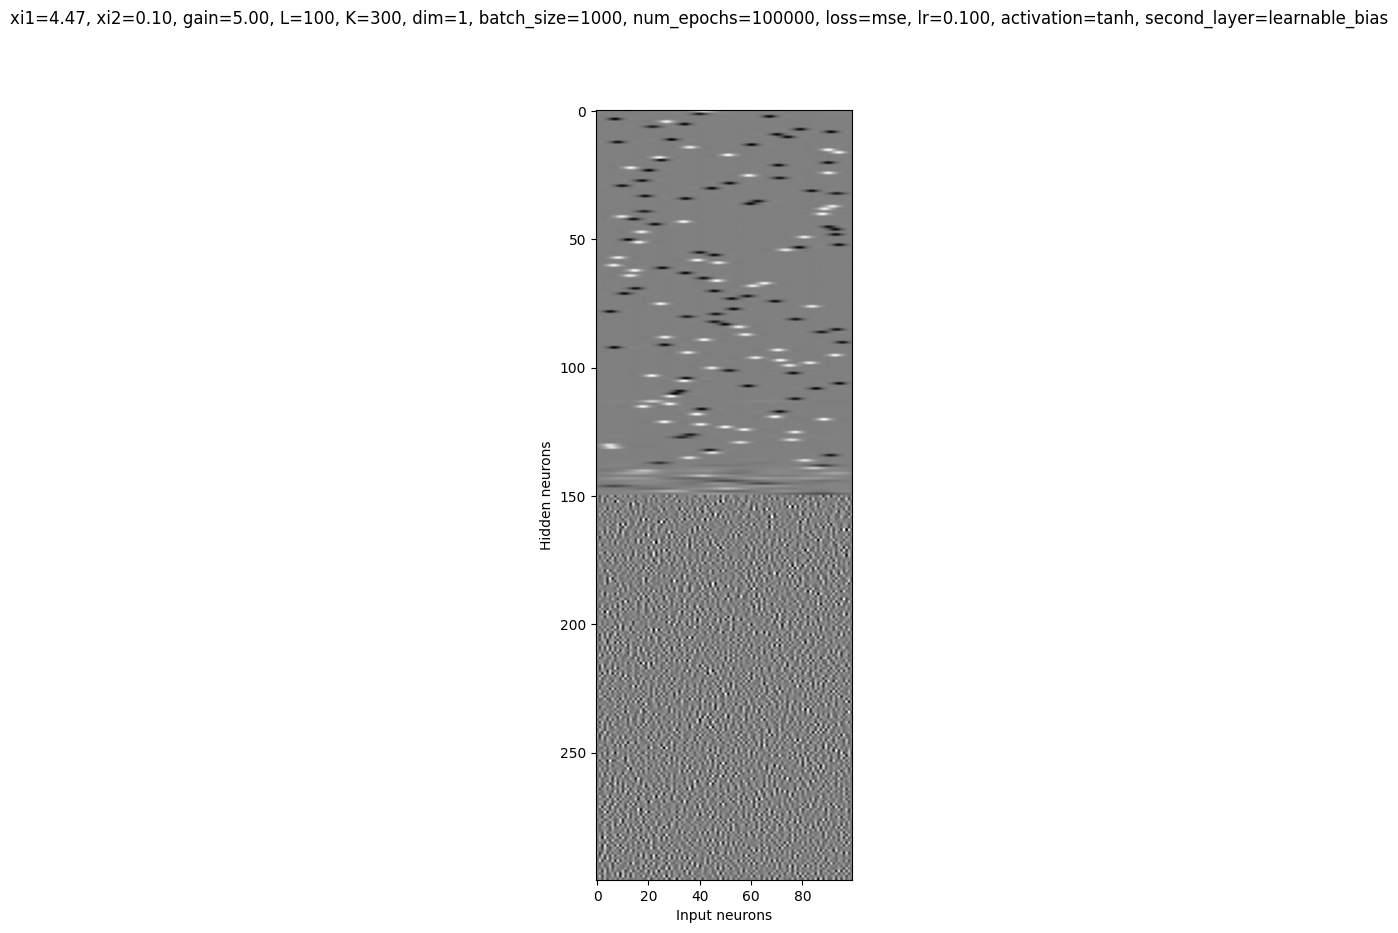

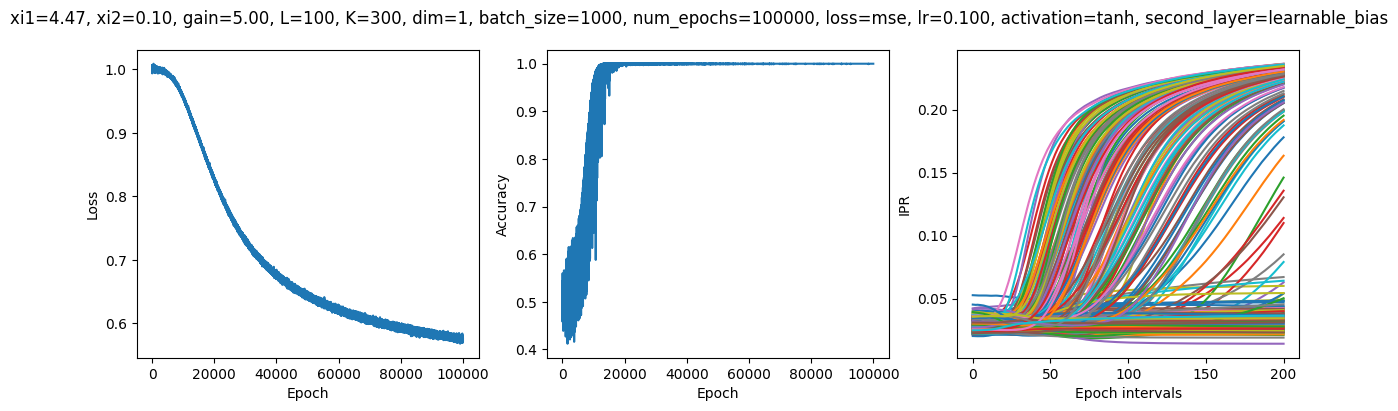

In [2]:
xi1, xi2, gain = 4.47, 0.1, 5
L, K, dim = 100, 300, 1
batch_size, num_epochs, loss, lr = 1000, 100000, 'mse', 0.1
activation, second_layer = 'tanh', 'learnable_bias'

weights, metrics = load_and_viz(xi1, xi2, gain, L, K, dim, batch_size, num_epochs, loss, lr, activation, second_layer, figsize1=(20, 10), figsize2=(15, 4))

In [10]:
conv = weights[compute_entropy(weights) < 3]

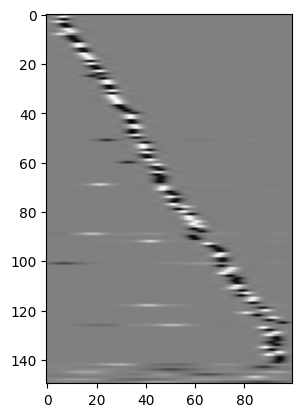

In [13]:
centers = np.mean(np.abs(conv) * np.arange(100), axis=1)
conv = conv[np.argsort(centers)]
plt.imshow(conv, cmap='gray')#, vmin=-1, vmax=1)